# EXPLORING DATA


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set_style('white')

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [98]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


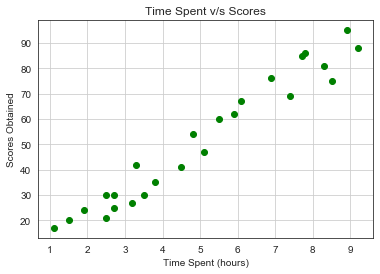

In [37]:
plt.plot(df['Hours'], df['Scores'], 'go')
plt.grid()
plt.title('Time Spent v/s Scores')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Scores Obtained')
plt.xticks()
plt.yticks()
plt.show()

# DEVELOP MODEL 

In [27]:
X = df[['Hours']]
y = df[['Scores']]


In [100]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=100) 

In [101]:
from sklearn.linear_model import LinearRegression  

lm = LinearRegression()  

lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Intercept c : [1.35656613]
Coefficient m : [[10.02193238]]


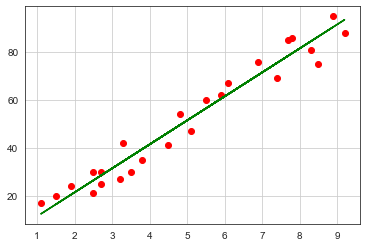

In [102]:
print('Intercept c : ' + str(lm.intercept_))
print('Coefficient m : ' + str(lm.coef_))

# y = mx + c
line = lm.coef_ * X + lm.intercept_

plt.scatter(X, y, color = 'red')
plt.plot(X, line, 'g')
plt.grid()

# PREDICTIONS 

In [103]:
predictions = lm.predict(X_test)

In [104]:
y_test

,Scores
9,25
22,35
13,42
11,62
5,20
19,69
23,76
21,54
6,88
12,41


In [105]:
predictions

array([[28.41578355],
       [39.43990917],
       [34.42894298],
       [60.48596716],
       [16.38946469],
       [75.51886573],
       [70.50789954],
       [49.46184154],
       [93.55834401],
       [46.45526183]])

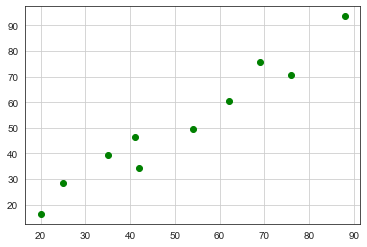

In [106]:
plt.scatter(y_test, predictions, color = 'green')
plt.grid()

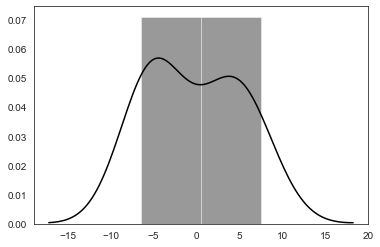

In [107]:
sns.distplot((y_test - predictions), hist = True, color = 'black', bins = 2)

In [108]:
hour_predict = [[9.25]]
ans = lm.predict(hour_predict)
ans

array([[94.05944063]])

# EVALUATE MODEL 

In [109]:
from sklearn import metrics

In [110]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  4.8114048367687605
MSE:  25.793826552105173
RMSE:  5.0787623051394295
